In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.datasets import make_classification

Загружаем данные

In [278]:
heart_df = pd.read_csv('heart.csv')
print(heart_df.info())
heart_df.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
47,50,M,ATA,140,216,0,Normal,170,N,0.0,Up,0
356,46,M,ASY,115,0,0,Normal,113,Y,1.5,Flat,1
717,49,F,ASY,130,269,0,Normal,163,N,0.0,Up,0


Посмотрим визуально на данные 

<AxesSubplot:title={'center':'Age Vs BloodPressure'}, xlabel='Age', ylabel='RestingBP'>

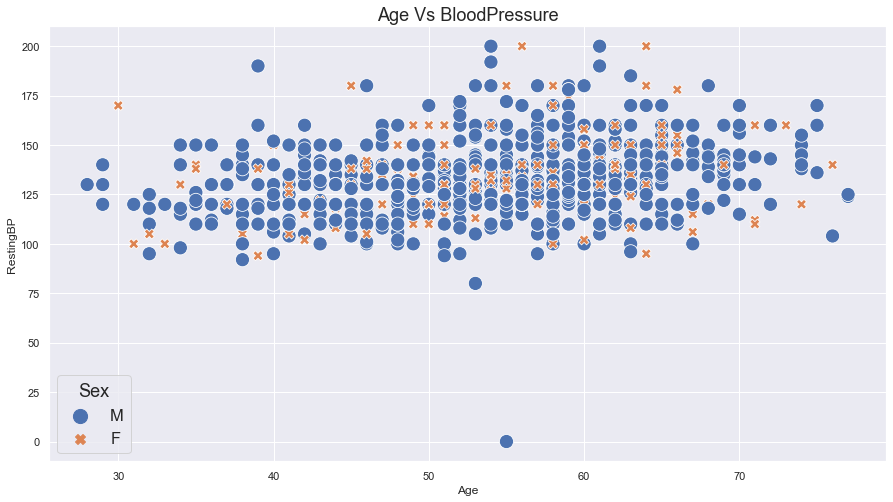

In [279]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.5)
# sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightblue'})
ax.set_title('Age Vs BloodPressure')
sns.scatterplot(data=heart_df, x='Age', y='RestingBP', hue='Sex', style='Sex', size='Sex', sizes=(100, 200))

<AxesSubplot:title={'center':'Major types of Chest Pains Seen in Pateints'}, xlabel='ChestPainType', ylabel='count'>

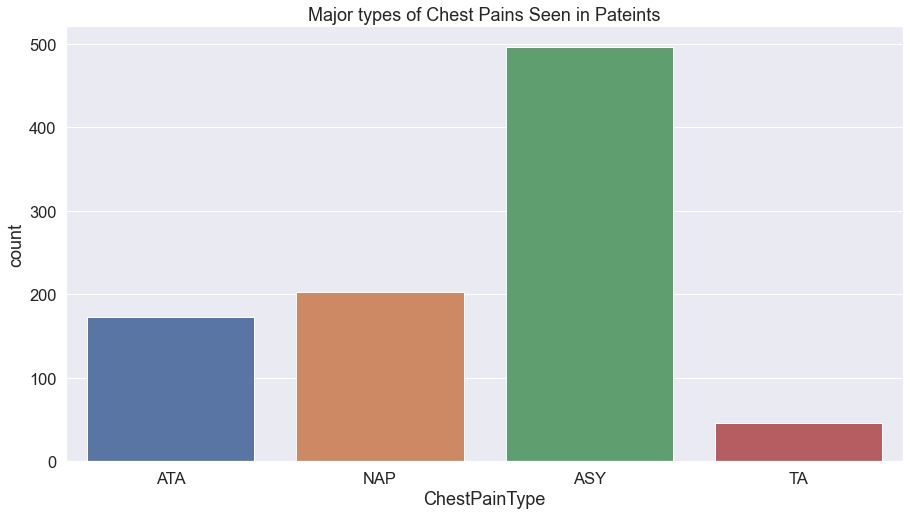

In [280]:
fig, ax = plt.subplots(figsize=(15,8))
ax.set_title('Major types of Chest Pains Seen in Pateints')
sns.countplot(data = heart_df, x='ChestPainType')

Отберем признаки с категориальными данными

In [281]:
categorials = list(heart_df.dtypes[heart_df.dtypes == object].index)
categorials

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

Отберем признаки с числовыми данными 

In [282]:
integer = [f for f in heart_df if f not in (categorials)]
integer

['Age',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'MaxHR',
 'Oldpeak',
 'HeartDisease']

Создадим датафрейм и преобразуем категориальные признаки в числовые

In [283]:
category_columns = pd.get_dummies(heart_df[categorials])
print(category_columns.info())
category_columns.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sex_F              918 non-null    uint8
 1   Sex_M              918 non-null    uint8
 2   ChestPainType_ASY  918 non-null    uint8
 3   ChestPainType_ATA  918 non-null    uint8
 4   ChestPainType_NAP  918 non-null    uint8
 5   ChestPainType_TA   918 non-null    uint8
 6   RestingECG_LVH     918 non-null    uint8
 7   RestingECG_Normal  918 non-null    uint8
 8   RestingECG_ST      918 non-null    uint8
 9   ExerciseAngina_N   918 non-null    uint8
 10  ExerciseAngina_Y   918 non-null    uint8
 11  ST_Slope_Down      918 non-null    uint8
 12  ST_Slope_Flat      918 non-null    uint8
 13  ST_Slope_Up        918 non-null    uint8
dtypes: uint8(14)
memory usage: 12.7 KB
None


,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
294,0,1,0,0,0,1,0,1,0,1,0,0,0,1
111,0,1,1,0,0,0,0,1,0,0,1,0,1,0
827,1,0,0,0,1,0,0,1,0,1,0,0,1,0


Объединим признаки в итоговый датафрейм 

In [284]:
heart_final = pd.concat([heart_df[integer], category_columns], axis=1)
print(heart_final.info())
heart_final.sample(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
288,48,133,308,0,156,2.0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
108,50,140,129,0,135,0.0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,1
238,48,160,355,0,99,2.0,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0


Подготовим данные для обучения модели 

In [285]:
X = heart_final.drop(['HeartDisease'], axis=1)
X.sample(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
431,62,120,220,0,86,0.0,0,1,1,0,0,0,0,0,1,1,0,0,0,1
856,39,140,321,0,182,0.0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
342,61,110,0,1,113,1.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0


In [286]:
y = heart_final['HeartDisease']
y.sample(3)

154    0
316    1
38     0
Name: HeartDisease, dtype: int64

Разделим данные на обучающую и тестовую выборки 

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Обучим модель Decision Tree Classifier

In [288]:
dtc = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        77
           1       0.86      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.80      0.80       184



Выведем график важности признаков модели Decision Tree Classifier

In [290]:
importances = dtc.feature_importances_
feature_names = list(heart_final.columns.drop(['HeartDisease']))
# print(feature_names)
dtc_importances = pd.Series(importances, index=feature_names)

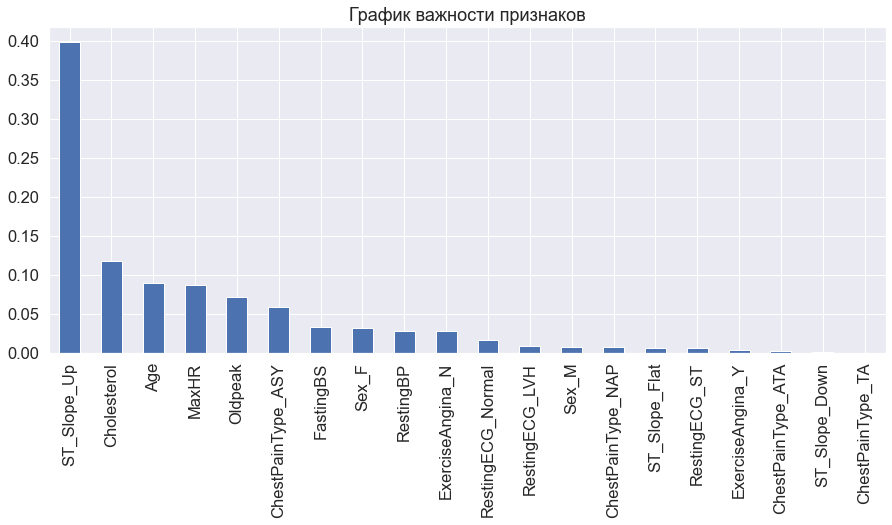

In [291]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title('График важности признаков')
dtc_importances.sort_values(ascending=False).plot.bar(ax=ax)
plt.show()

Обучим модель Random Forest Classifier

In [292]:
rfc = RandomForestClassifier(max_depth=2, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        77
           1       0.86      0.84      0.85       107

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



Обучим Bagging для модели Decision Tree Classifier

In [293]:
bagging = BaggingClassifier(DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, random_state=42)

In [294]:
bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                  max_samples=0.5, random_state=42)

In [295]:
y_pred = bagging.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        77
           1       0.92      0.79      0.85       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.86      0.84      0.84       184



Произведем обучение стекинга трех моделей

In [311]:
estimators = [
     ('DecisionTreeClassifier', DecisionTreeClassifier(random_state=42)),
     ('RandomForestClassifier', RandomForestClassifier(max_depth=2, random_state=42)),
     ('LinearSVC', make_pipeline(StandardScaler(),LinearSVC(random_state=42, tol=1e-5)))
             ]

In [316]:
staking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state=42)).fit(X_train, y_train)

C:\Users\vagin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vagin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vagin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vagin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vagin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\vagin\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number 

In [317]:
y_pred = staking_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



Выведем итоговый график результатов

In [319]:
score_train = {}
score_test = {}

for i in staking_clf.named_estimators:
    score_train[i] = staking_clf.named_estimators_[i].score(X_train, y_train)
    score_test[i] = staking_clf.named_estimators_[i].score(X_test, y_test)

score_train['Total']= staking_clf.score(X_train, y_train)
score_test['Total']= staking_clf.score(X_test, y_test)

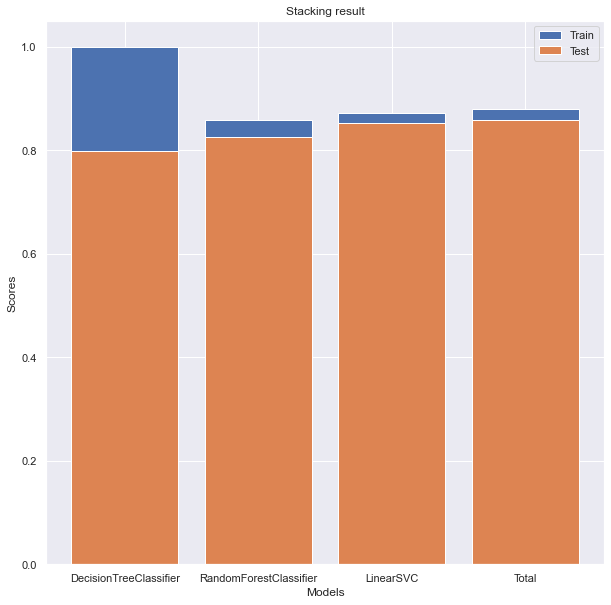

In [320]:
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
plt.bar(range(len(score_train)), score_train.values(), align="center", label='Train')
plt.xticks(range(len(score_train)), list(score_train.keys()))
plt.bar(range(len(score_test)), score_test.values(), align="center", label='Test')
plt.xticks(range(len(score_test)), list(score_test.keys()))
plt.autoscale
plt.title('Stacking result')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()

### Вывод:
Лучше всех справилась LinearSVC. Деревья решений, как и предполагалось, переобучилась. Модель случайный лестоже не плохо справилась с задачей.